In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from keras.datasets import mnist # MNIST dataset is included in Keras

In [ ]:
# The MNIST data is split between 60,000 training images and 10,000 test image
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


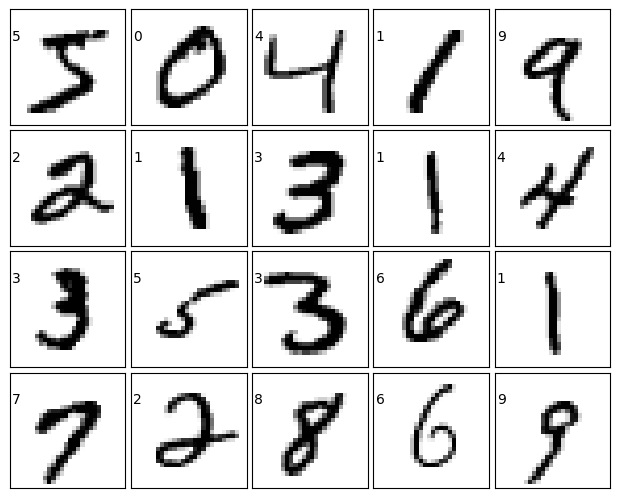

In [ ]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

In [ ]:
# Reshaping the dataset
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
# Apply standarization to both train and test data
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
# initializing the pca
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [ ]:
print(f'Total number of components used after PCA : {pca.n_components_}')

Total number of components used after PCA : 331


In [ ]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

print(f'train_img shape : {train_img.shape}')
print(f'test_img shape : {test_img.shape}')

train_img shape : (60000, 331)
test_img shape : (10000, 331)


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
clf = MLPClassifier(solver = 'lbfgs')

In [ ]:
clf.fit(train_img, y_train)

MLPClassifier(solver='lbfgs')

In [ ]:
print('Training score : ', clf.score(train_img, y_train))
print('Testing score  : ', clf.score(test_img, y_test))

Training score :  1.0
Testing score  :  0.974


In [ ]:
# The data used is the original train and test data
X_train.shape

(60000, 784)

In [ ]:
from sklearn.decomposition import PCA
list_variance = [.85, .90, .95, .99]
train_data = []
test_data = []
i = 0

for variance in list_variance:
  print(f'Dataset dimensional reduction with {variance*100}% variance retained')
  print('='*60)

  pca = PCA(n_components=variance)
  pca.fit(X_train)

  train_data.append(pca.transform(X_train))
  test_data.append(pca.transform(X_test))

  print(f'> Total number of components for variance {variance} : {pca.n_components_}')
  print(f'> Train data shape : {train_data[i].shape}')
  print(f'> Test data shape  : {test_data[i].shape}\n')
  i += 1

Dataset dimensional reduction with 85.0% variance retained
> Total number of components for variance 0.85 : 185
> Train data shape : (60000, 185)
> Test data shape  : (10000, 185)

Dataset dimensional reduction with 90.0% variance retained
> Total number of components for variance 0.9 : 236
> Train data shape : (60000, 236)
> Test data shape  : (10000, 236)

Dataset dimensional reduction with 95.0% variance retained
> Total number of components for variance 0.95 : 331
> Train data shape : (60000, 331)
> Test data shape  : (10000, 331)

Dataset dimensional reduction with 99.0% variance retained
> Total number of components for variance 0.99 : 543
> Train data shape : (60000, 543)
> Test data shape  : (10000, 543)



In [ ]:
from sklearn.neural_network import MLPClassifier
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
start_time = time.time()
clf = MLPClassifier(solver = 'lbfgs', max_iter=100)
clf.fit(X_train, y_train)
end_time = time.time()

print(f'Control result with original dataset (100% variance)')
print('='*60)
print(f'Training score : ', clf.score(X_train, y_train))
print(f'Testing score  : ', clf.score(X_test, y_test))
print(f'Time (seconds) : {end_time - start_time} \n')

Control result with original dataset (100% variance)
Training score :  1.0
Testing score  :  0.9739
Time (seconds) : 120.73487973213196 



In [ ]:
for i in range(0, 4):
  start_time = time.time()
  clf = MLPClassifier(solver = 'lbfgs', max_iter=100)
  clf.fit(train_data[i], y_train)
  end_time = time.time()

  print(f'Dataset with {list_variance[i]*100}% variance retained')
  print('='*40)
  print(f'Training score : ', clf.score(train_data[i], y_train))
  print(f'Testing score  : ', clf.score(test_data[i], y_test))
  print(f'Time (seconds) : {end_time - start_time} \n')

Dataset with 85.0% variance retained
Training score :  1.0
Testing score  :  0.9724
Time (seconds) : 60.052964210510254 

Dataset with 90.0% variance retained
Training score :  1.0
Testing score  :  0.9735
Time (seconds) : 66.5425922870636 

Dataset with 95.0% variance retained
Training score :  1.0
Testing score  :  0.9736
Time (seconds) : 79.09472441673279 

Dataset with 99.0% variance retained
Training score :  1.0
Testing score  :  0.9698
Time (seconds) : 99.19964957237244 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(8, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot fit_time vs score
    axes[1].grid()
    axes[1].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[1].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[1].set_xlabel("fit_times")
    axes[1].set_ylabel("Score")
    axes[1].set_title("Performance of the model")

    return plt

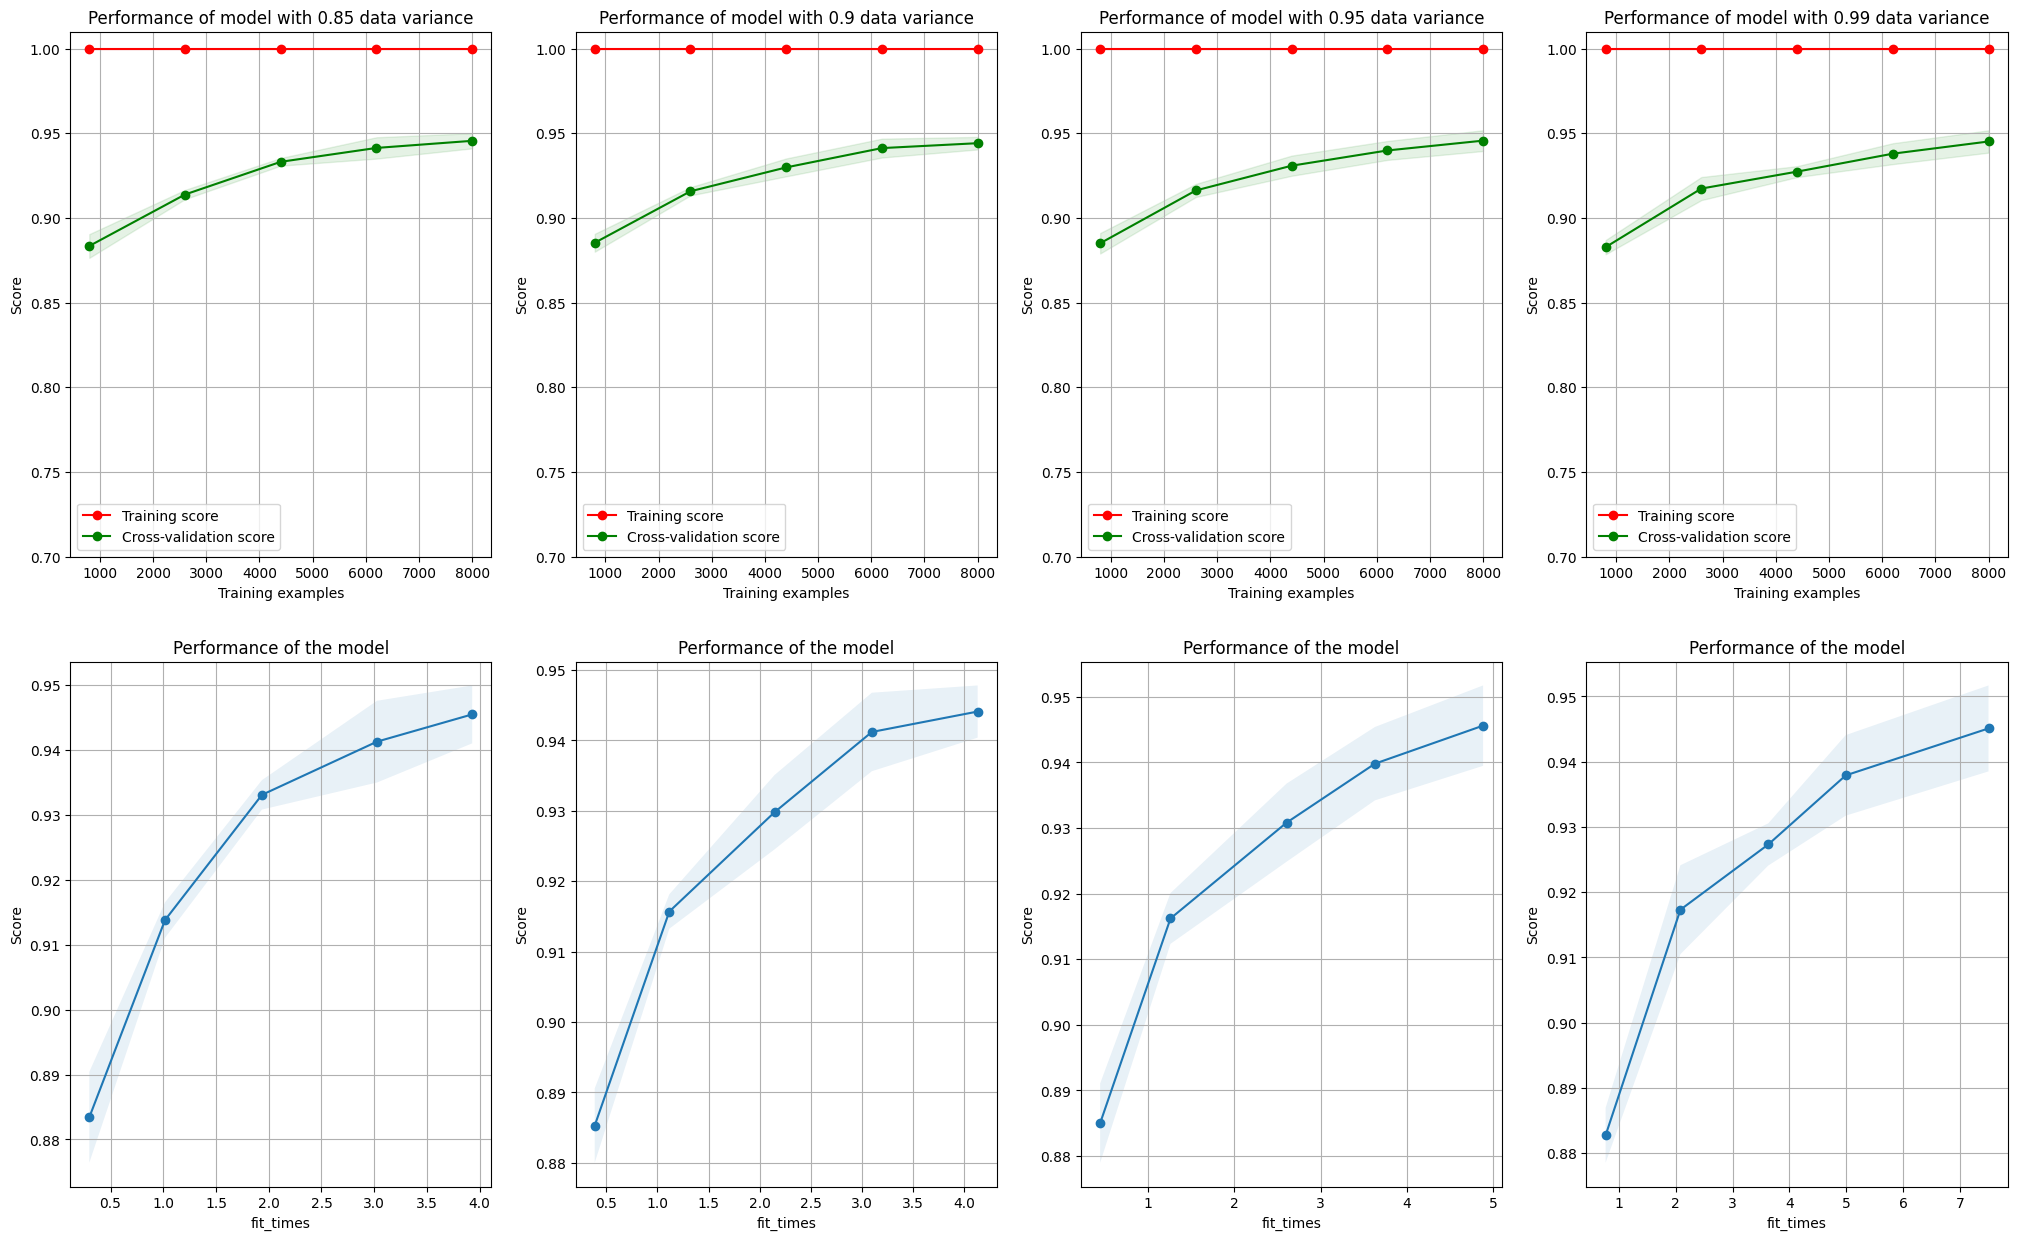

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

fig, axes = plt.subplots(2, 4, figsize=(25, 15))

for i in range(0,4):
  title = "Performance of model with " + str(list_variance[i]) + " data variance"
  estimator = MLPClassifier(solver = 'lbfgs', max_iter=100)
  plot_learning_curve(estimator, title, test_data[i], y_test, axes=axes[:, i],
                        ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

In [ ]:
# Calculate component reduction percentage

components = [185, 236, 331, 543, 784]
components_reduction = []

for cc in components:
  z = (1.0 - (cc / 784)) * 100
  z = round(z, 2)
  components_reduction.append(z)

components_reduction

[76.4, 69.9, 57.78, 30.74, 0.0]

In [ ]:
# Calculate training time reduction percentage

train_time = [43.96, 49.2, 54.9,64.47, 76.19]
train_time_reduction = []

for time in train_time:
  reduction = (1.0 - (time / 76.19)) * 100
  reduction = round(reduction, 2)
  train_time_reduction.append(reduction)

train_time_reduction

[42.3, 35.42, 27.94, 15.38, 0.0]

In [ ]:
# Calculate accuracy difference

accuracy = [0.9722, 0.9744, 0.9733, 0.9735, 0.9744]
accuracy_diff = []

for acc in accuracy:
  x = 0.9744 - acc
  x = round(x, 4)
  accuracy_diff.append(x)

accuracy_diff

[0.0022, 0.0, 0.0011, 0.0009, 0.0]

In [ ]:
result = {'Data Variance' : ['85%', '90%', '95%', '99%', '100%'],
          'Components' : components,
          'Components Reduction (%)' : components_reduction,
          'Accuracy' : accuracy,
          'Accuracy Difference' : accuracy_diff,
          'Train Time': train_time,
          'Train time Reduction (%)' : train_time_reduction,
          }
res_df = pd.DataFrame(result)
res_df

,Data Variance,Components,Components Reduction (%),Accuracy,Accuracy Difference,Train Time,Train time Reduction (%)
0,85%,185,76.40,0.9722,0.0022,43.96,42.30
1,90%,236,69.90,0.9744,0.0000,49.20,35.42
2,95%,331,57.78,0.9733,0.0011,54.90,27.94
3,99%,543,30.74,0.9735,0.0009,64.47,15.38
4,100%,784,0.00,0.9744,0.0000,76.19,0.00
